## Importing libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_churn.csv")


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   SeniorCitizen     12055 non-null  int64  
 2   Partner           12055 non-null  object 
 3   Dependents        12055 non-null  object 
 4   tenure            11451 non-null  float64
 5   PhoneService      12055 non-null  object 
 6   MultipleLines     12055 non-null  object 
 7   InternetService   12055 non-null  object 
 8   OnlineSecurity    12055 non-null  object 
 9   OnlineBackup      12055 non-null  object 
 10  DeviceProtection  12055 non-null  object 
 11  TechSupport       12055 non-null  object 
 12  StreamingTV       12055 non-null  object 
 13  StreamingMovies   12055 non-null  object 
 14  Contract          12055 non-null  object 
 15  PaperlessBilling  12055 non-null  object 
 16  PaymentMethod     12055 non-null  object

In [ ]:
churn_df.shape

(12055, 20)

In [ ]:
churn_df.describe()

,SeniorCitizen,tenure
count,12055.000,11451.000
mean,0.118,31.238
std,0.323,25.027
min,0.000,-3.000
25%,0.000,6.000
50%,0.000,28.000
75%,0.000,54.000
max,1.000,74.000


In [ ]:
churn_df["Churn"].value_counts()

,count
Churn,
No,3473
No,1762
NO,1732
no,1683
Yes,1356
yes,714
YES,684
Yes,651


In [ ]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85,$29.85,No
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,$56.95,$1889.5,NO
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85,$108.15,YES
3,Male,0,No,No,45.000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,bank transfer (automatic),$42.3,$1840.75,No
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,ELECTRONIC CHECK,$70.7,$nan,yes


In [ ]:
churn_df.duplicated().sum()

np.int64(2)

In [ ]:
churn_df[churn_df.duplicated()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5759,Female,0,No,No,1.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,MAILED CHECK,$70.15,$70.15,Yes
12043,Female,0,Yes,Yes,50.000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),$20.55,$1070.25,No


In [ ]:
churn_df[churn_df.duplicated(keep=False)]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5522,Female,0,No,No,1.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,MAILED CHECK,$70.15,$70.15,Yes
5759,Female,0,No,No,1.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,MAILED CHECK,$70.15,$70.15,Yes
6584,Female,0,Yes,Yes,50.000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),$20.55,$1070.25,No
12043,Female,0,Yes,Yes,50.000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),$20.55,$1070.25,No


In [ ]:
# let's check for missing values in the data
round(churn_df.isnull().sum() / churn_df.isnull().count() * 100, 2)

,0
gender,0.000
SeniorCitizen,0.000
Partner,0.000
Dependents,0.000
tenure,5.010
PhoneService,0.000
MultipleLines,0.000
InternetService,0.000
OnlineSecurity,0.000
OnlineBackup,0.000


In [ ]:
churn_df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,78
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


# Simple Data Cleaning for EDA

In [ ]:


# Step 1: Strip extra spaces and make everything lowercase
churn_df['Churn'] = churn_df['Churn'].str.strip().str.lower()

# Step 2: Standardize the values to "Yes" or "No"
churn_df['Churn'] = churn_df['Churn'].replace({'yes': 'Yes', 'no': 'No'})

# Step 1: Remove leading/trailing spaces and make lowercase
churn_df['PaymentMethod'] = churn_df['PaymentMethod'].str.strip().str.lower()

# Step 2: Standardize wording to consistent readable form
churn_df['PaymentMethod'] = churn_df['PaymentMethod'].replace({
    'electronic check': 'Electronic check',
    'mailed check': 'Mailed check',
    'bank transfer (automatic)': 'Bank transfer (automatic)',
    'credit card (automatic)': 'Credit card (automatic)'
})

# Removing $ sign
churn_df['MonthlyCharges'] = churn_df['MonthlyCharges'].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)

churn_df['MonthlyCharges'] = pd.to_numeric(churn_df['MonthlyCharges'], errors='coerce')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')


In [ ]:
churn_df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,78
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [ ]:
for col in churn_df.columns:
    print(f"\n--- {col} ---")
    print(churn_df[col].value_counts())



--- gender ---
gender
Male      6710
Female    5345
Name: count, dtype: int64

--- SeniorCitizen ---
SeniorCitizen
0    10633
1     1422
Name: count, dtype: int64

--- Partner ---
Partner
No     6989
Yes    5066
Name: count, dtype: int64

--- Dependents ---
Dependents
No     8846
Yes    3209
Name: count, dtype: int64

--- tenure ---
tenure
1.000     993
2.000     607
72.000    401
3.000     330
0.000     300
         ... 
63.000     77
73.000     32
-2.000     23
74.000      6
-3.000      1
Name: count, Length: 78, dtype: int64

--- PhoneService ---
PhoneService
Yes    10747
No      1308
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
Yes                 5609
No                  5157
No phone service    1289
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    4878
DSL            4350
No             2827
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     6312
Yes                    2924
No internet servic

In [ ]:
churn_df[['MonthlyCharges', 'TotalCharges']].head(10)

,MonthlyCharges,TotalCharges
0,29.850,29.850
1,56.950,1889.500
2,53.850,108.150
3,42.300,1840.750
4,70.700,NaN
5,99.650,820.500
6,89.100,1949.400
7,29.750,301.900
8,104.800,3046.050
9,56.150,3487.950


In [ ]:
churn_df[['MonthlyCharges', 'TotalCharges']].isna().sum()


,0
MonthlyCharges,301
TotalCharges,1205


In [ ]:
churn_df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,604
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# EDA

## Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

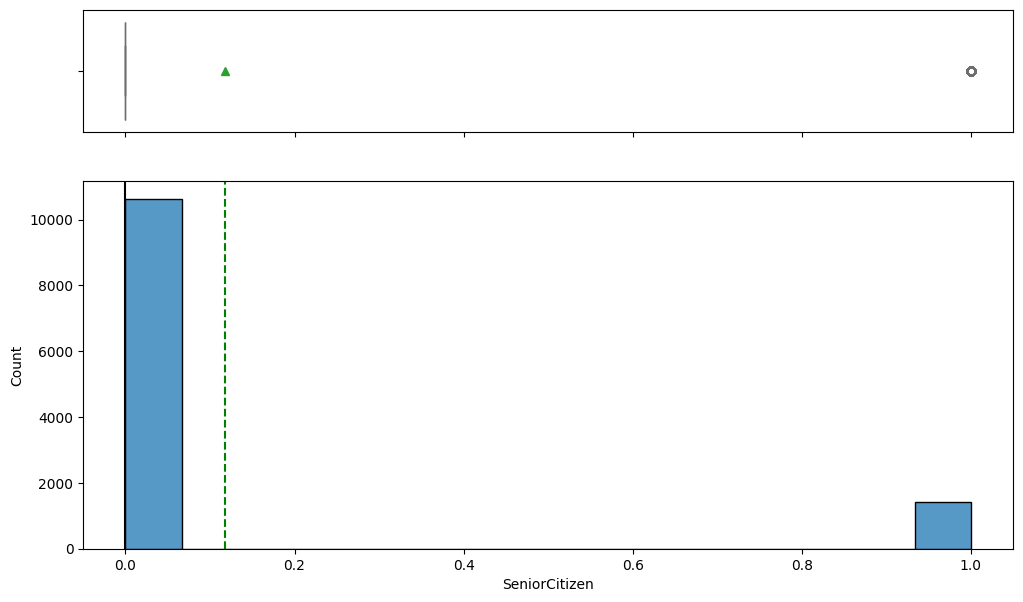

In [ ]:
# Observations on SeniorCitizen
histogram_boxplot(churn_df, "SeniorCitizen")

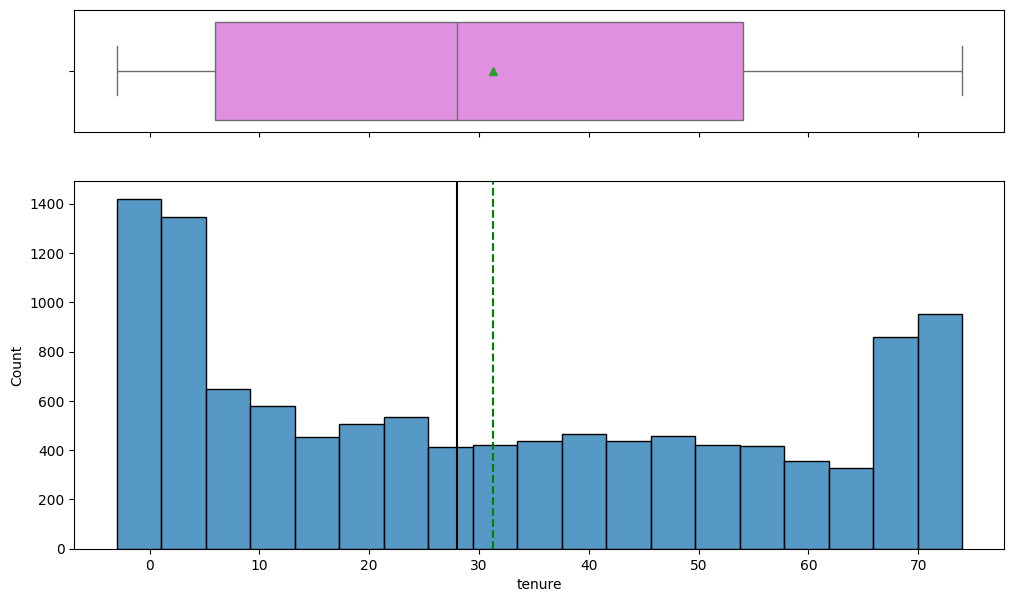

In [ ]:
# Observations on tenure
histogram_boxplot(churn_df, "tenure")

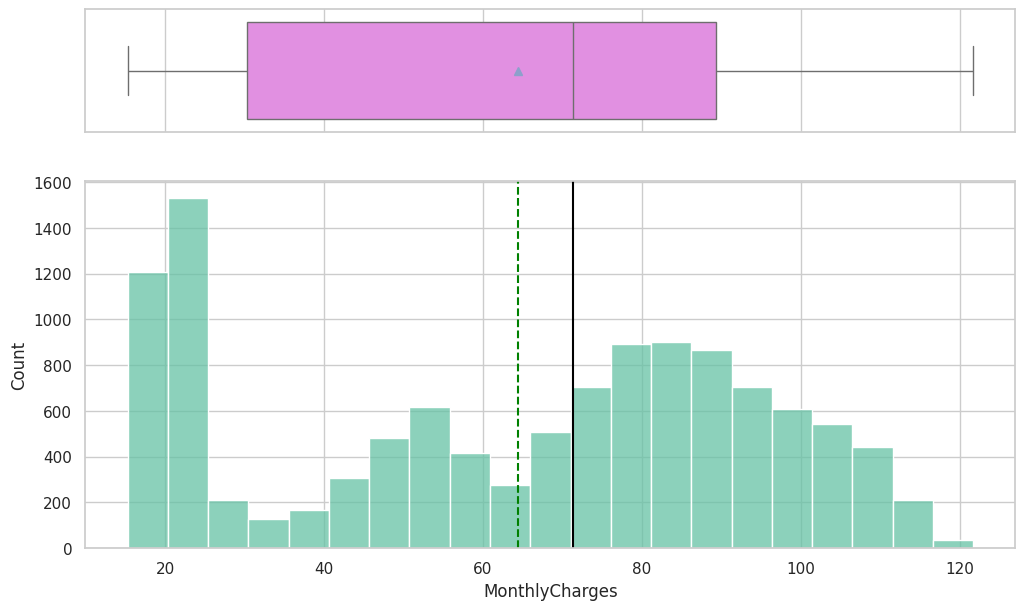

In [ ]:
# Observations on MonthlyCharges
histogram_boxplot(churn_df, "MonthlyCharges")

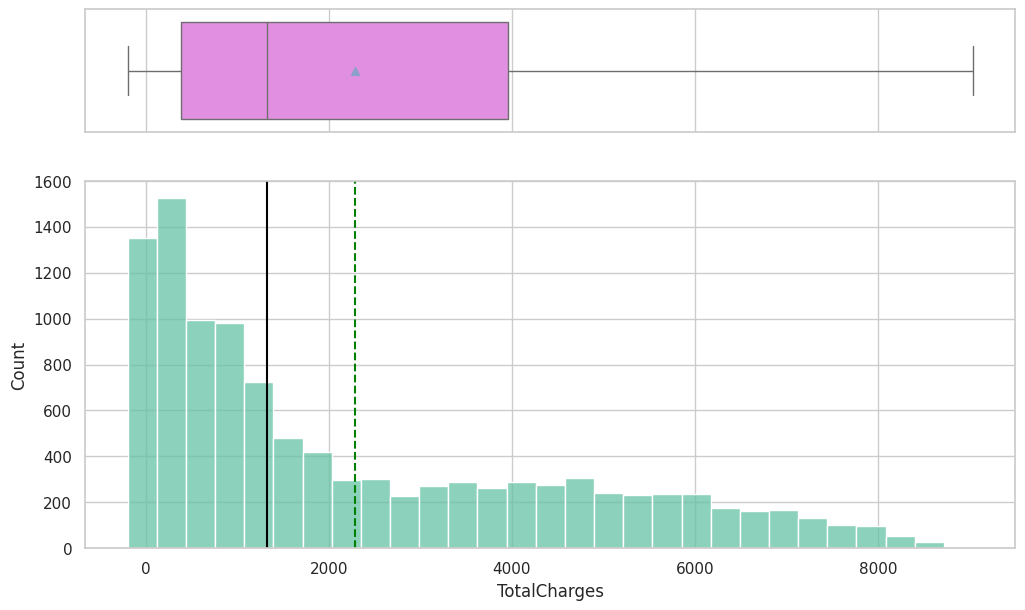

In [ ]:
# Observations on TotalCharges
histogram_boxplot(churn_df, "TotalCharges")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

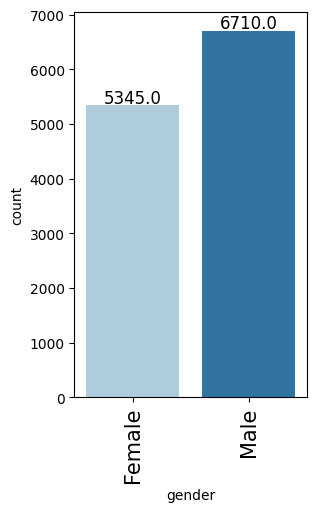

In [ ]:
# observations on gender
labeled_barplot(churn_df, "gender")

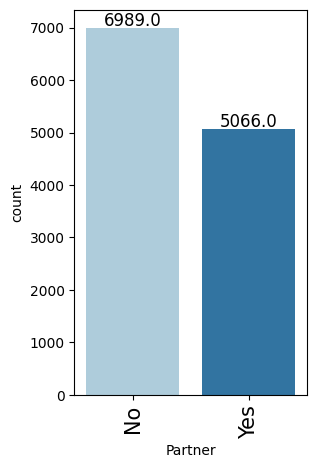

In [ ]:
# observations on Partner
labeled_barplot(churn_df, "Partner")

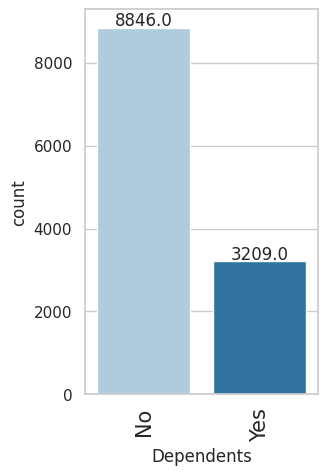

In [ ]:
# observations on Dependents
labeled_barplot(churn_df, "Dependents")

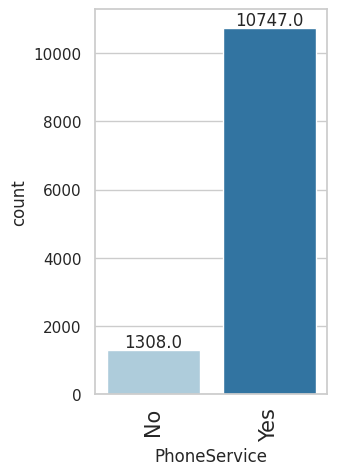

In [ ]:
# observations on PhoneService
labeled_barplot(churn_df, "PhoneService")

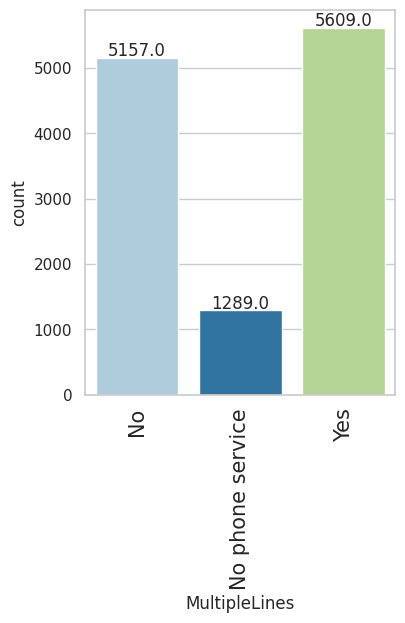

In [ ]:
# observations on MultipleLines
labeled_barplot(churn_df, "MultipleLines")

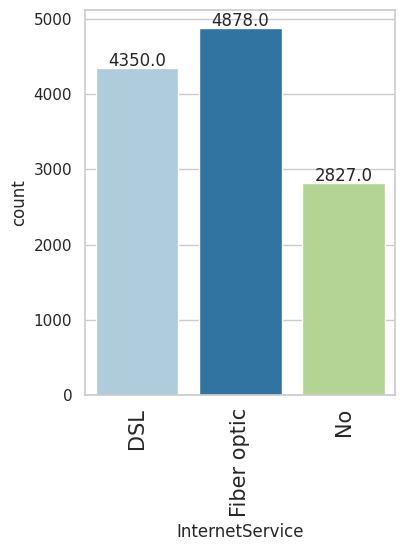

In [ ]:
# observations on InternetService
labeled_barplot(churn_df, "InternetService")

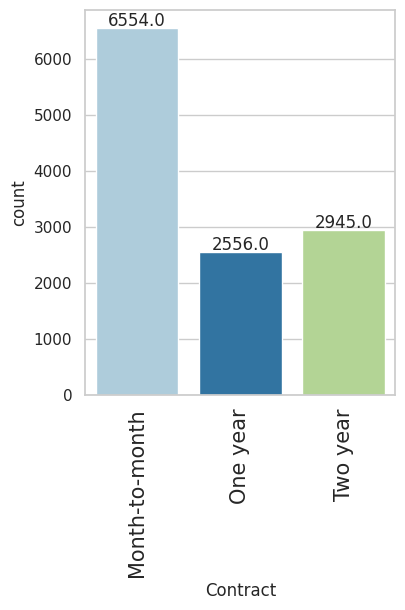

In [ ]:
# observations on Contract
labeled_barplot(churn_df, "Contract")

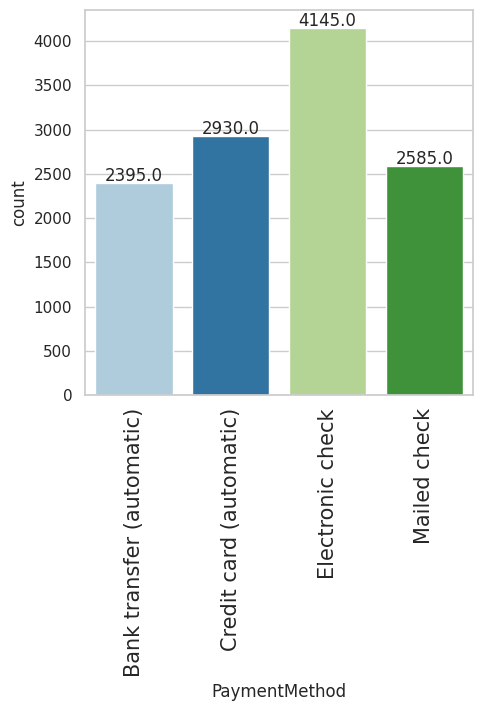

In [ ]:
# observations on PaymentMethod
labeled_barplot(churn_df, "PaymentMethod")

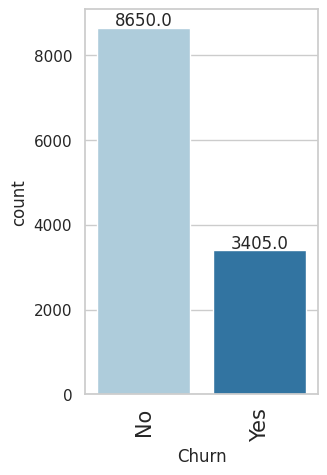

In [ ]:
# observations on Churn
labeled_barplot(churn_df, "Churn")

## Bivariate Analysis

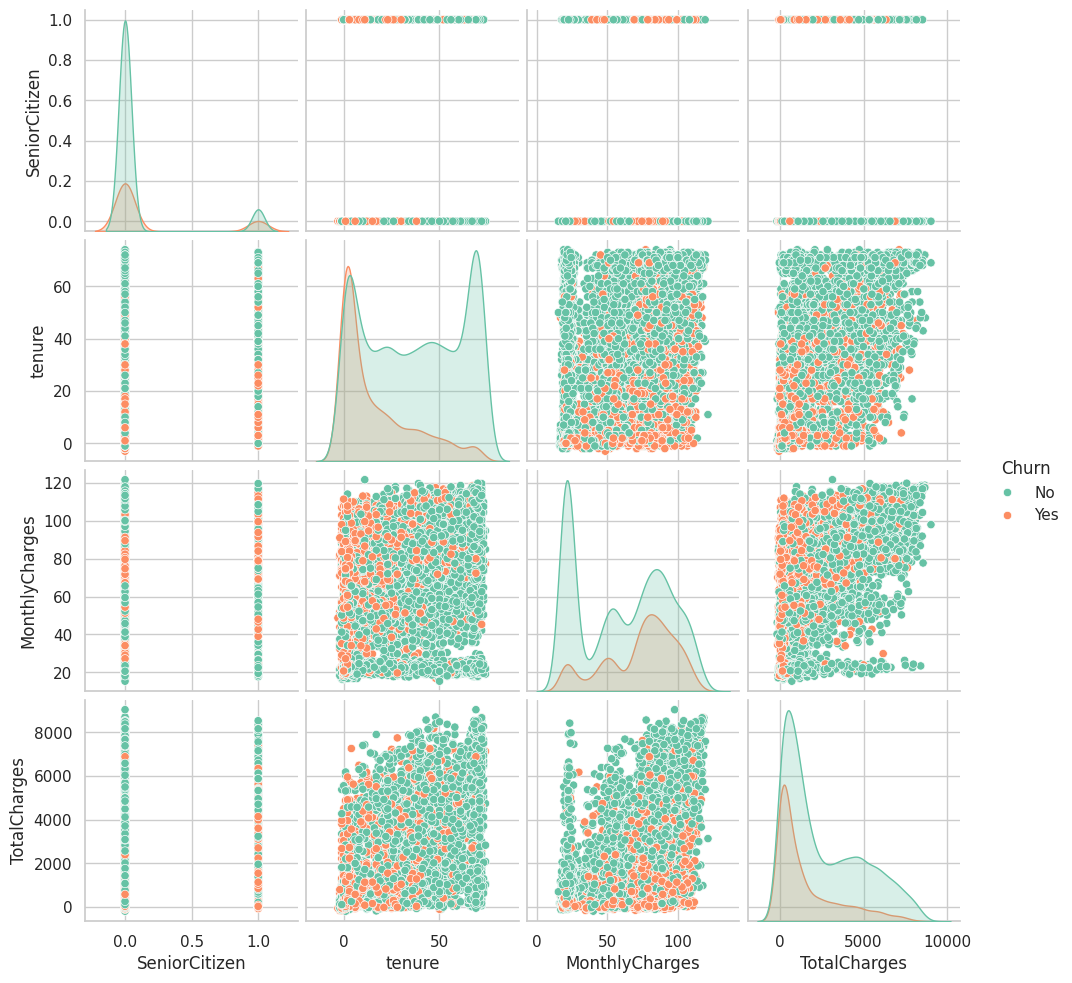

In [ ]:
sns.pairplot(churn_df, hue="Churn")

<Axes: xlabel='Churn', ylabel='tenure'>

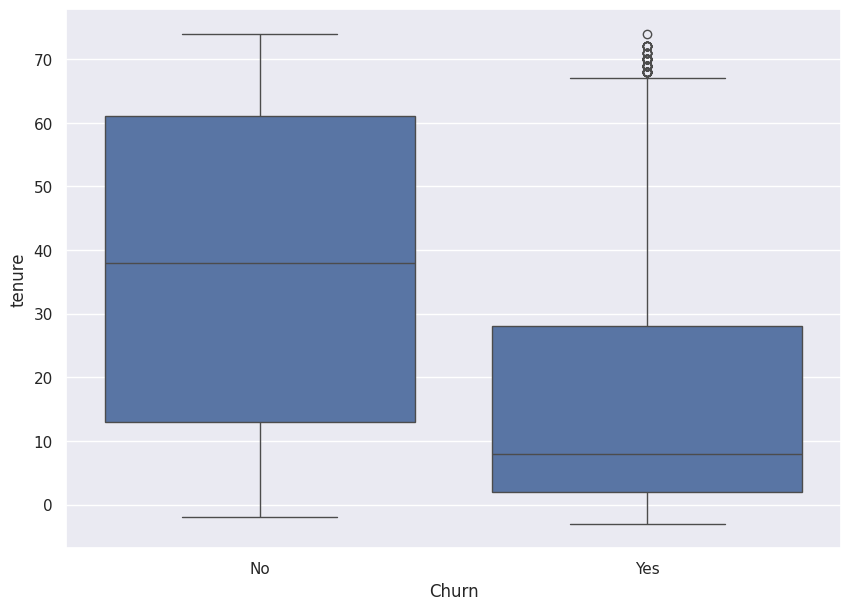

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Churn", y="tenure", data=churn_df, orient="vertical")

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

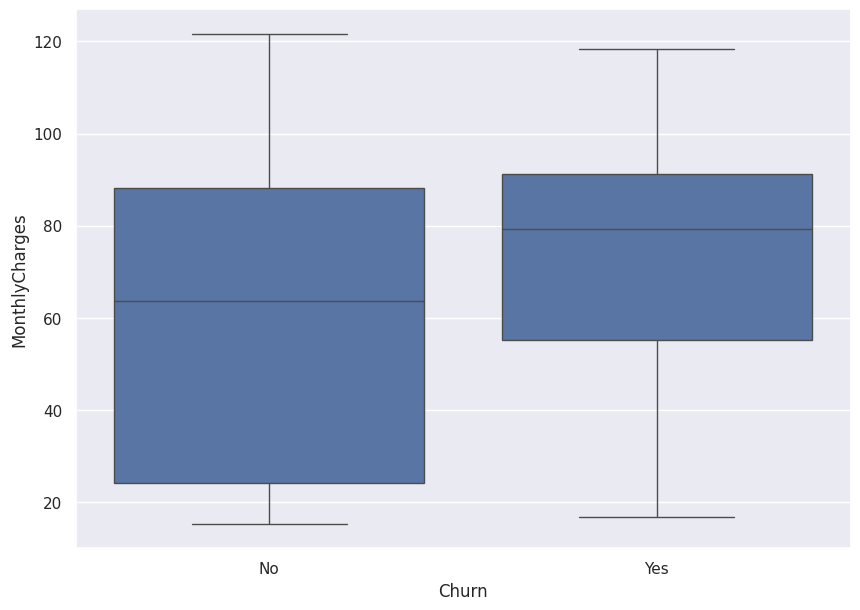

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Churn", y="MonthlyCharges", data=churn_df, orient="vertical")

<Axes: xlabel='Churn', ylabel='TotalCharges'>

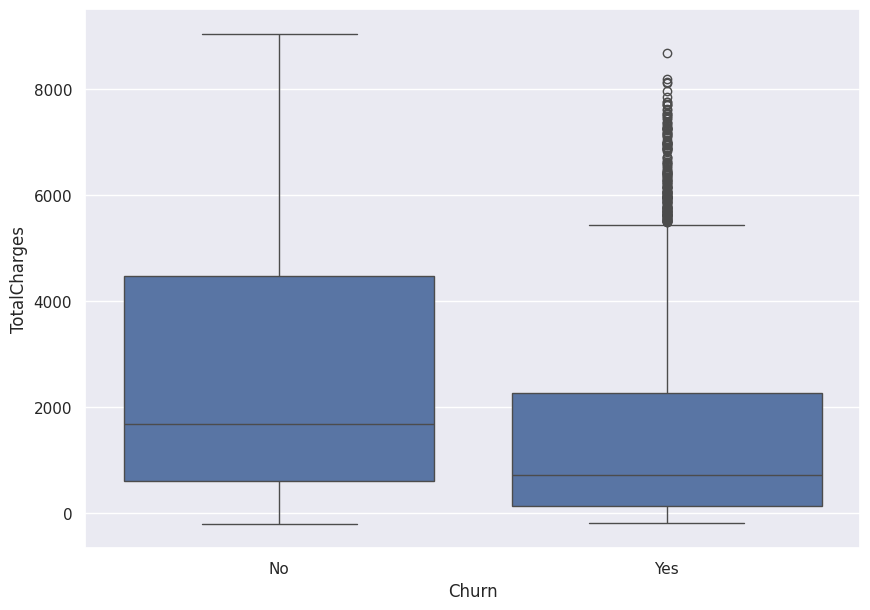

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Churn", y="TotalCharges", data=churn_df, orient="vertical")

<Axes: xlabel='PaymentMethod', ylabel='TotalCharges'>

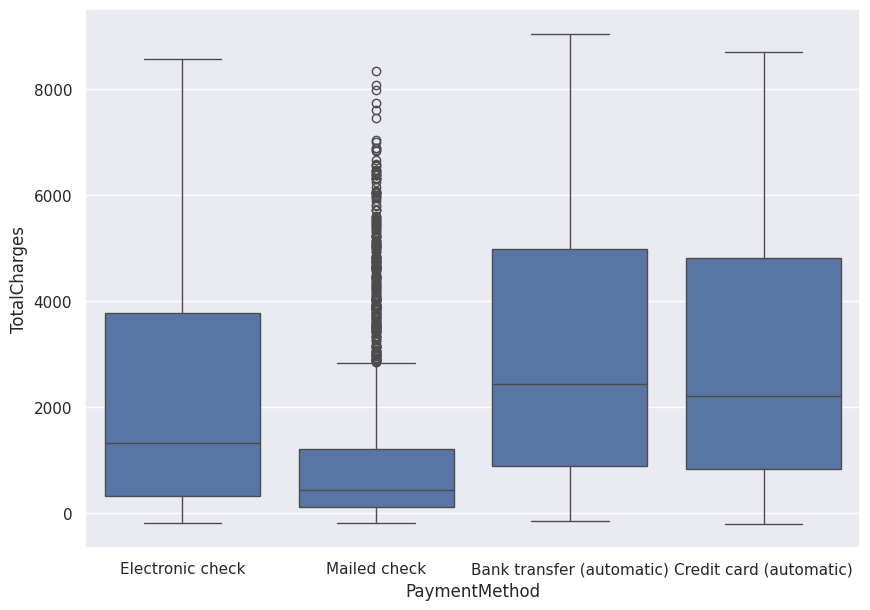

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="PaymentMethod", y="TotalCharges", data=churn_df, orient="vertical")

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Churn            No   Yes    All
SeniorCitizen                   
All            8650  3405  12055
0              7832  2801  10633
1               818   604   1422
------------------------------------------------------------------------------------------------------------------------


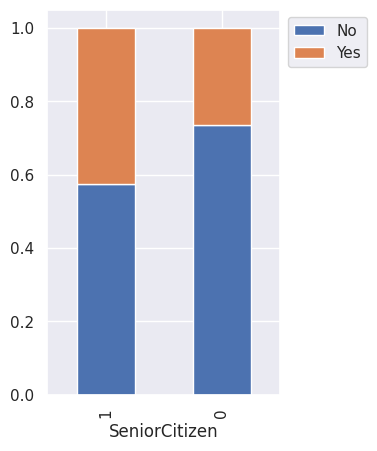

In [ ]:
stacked_barplot(churn_df, "SeniorCitizen", "Churn")

Churn              No   Yes    All
InternetService                   
All              8650  3405  12055
Fiber optic      2686  2192   4878
DSL              3404   946   4350
No               2560   267   2827
------------------------------------------------------------------------------------------------------------------------


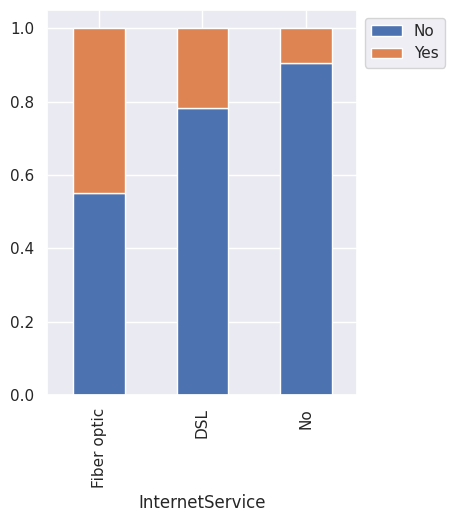

In [ ]:
stacked_barplot(churn_df, "InternetService", "Churn")

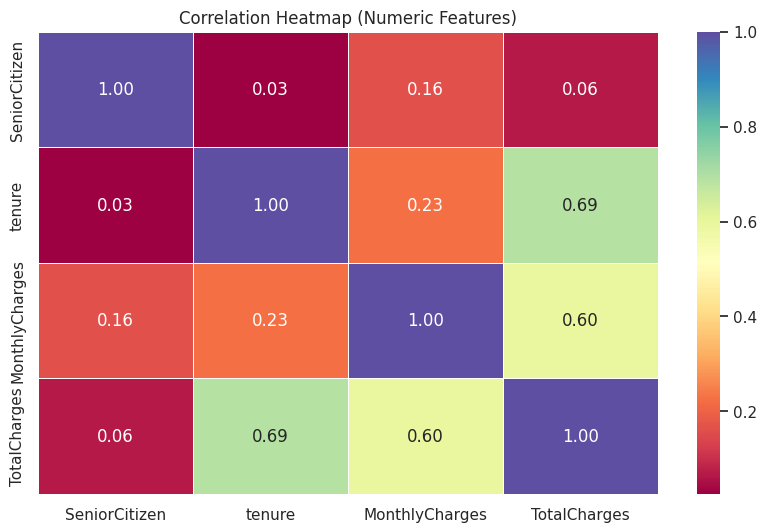

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
num_df = churn_df.select_dtypes(include=['int64','float64'])

# Compute correlation
corr = num_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap="Spectral")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


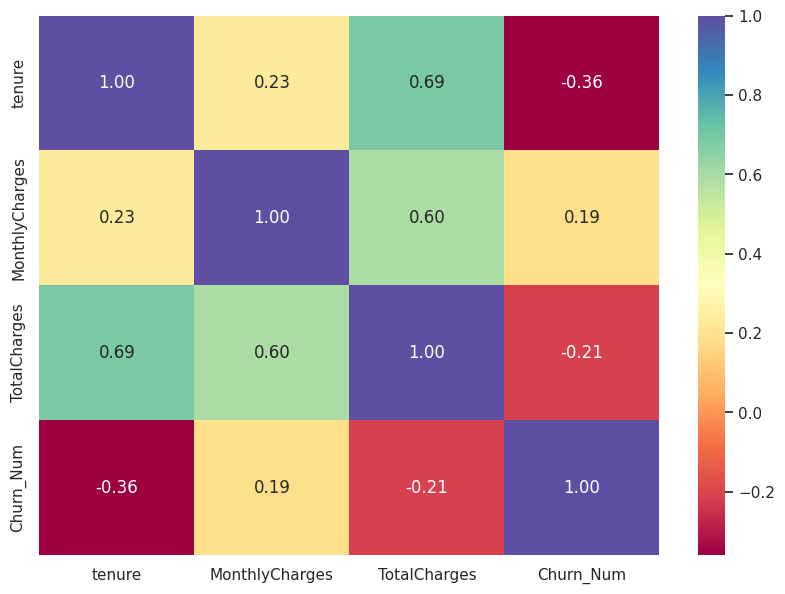

In [ ]:
churn_df['Churn_Num'] = churn_df['Churn'].map({'Yes':1, 'No':0})

num_df = churn_df[['tenure','MonthlyCharges','TotalCharges','Churn_Num']]
sns.heatmap(num_df.corr(), annot=True, fmt=".2f",cmap="Spectral")
plt.show()


### K means clustering for EDA

In [ ]:
churn_ddf= churn_df.copy()

### Treating missing values for clusting with separate Dataset

In [ ]:
# Step 1: Strip extra spaces and make everything lowercase
churn_ddf['Churn'] = churn_ddf['Churn'].str.strip().str.lower()

# Step 2: Standardize the values to "Yes" or "No"
churn_ddf['Churn'] = churn_ddf['Churn'].replace({'yes': 'Yes', 'no': 'No'})

# Step 1: Remove leading/trailing spaces and make lowercase
churn_ddf['PaymentMethod'] = churn_ddf['PaymentMethod'].str.strip().str.lower()

# Step 2: Standardize wording to consistent readable form
churn_ddf['PaymentMethod'] = churn_ddf['PaymentMethod'].replace({
    'electronic check': 'Electronic check',
    'mailed check': 'Mailed check',
    'bank transfer (automatic)': 'Bank transfer (automatic)',
    'credit card (automatic)': 'Credit card (automatic)'
})

churn_ddf['MonthlyCharges'] = churn_ddf['MonthlyCharges'].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
churn_ddf['TotalCharges'] = churn_ddf['TotalCharges'].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)

churn_ddf['MonthlyCharges'] = pd.to_numeric(churn_ddf['MonthlyCharges'], errors='coerce')
churn_ddf['TotalCharges'] = pd.to_numeric(churn_ddf['TotalCharges'], errors='coerce')


In [ ]:
churn_ddf['MonthlyCharges'].fillna(churn_ddf['MonthlyCharges'].median(), inplace=True)
churn_ddf['TotalCharges'].fillna(churn_ddf['TotalCharges'].median(), inplace=True)

churn_ddf['tenure'].fillna(churn_ddf['tenure'].median(), inplace=True)

In [ ]:
churn_ddf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45.000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,NaN,Yes


In [ ]:
churn_ddf.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,604
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1) Exclude target & ID columns
to_exclude = ["Churn"]

# 2) Keep only numeric columns and exclude unwanted columns
num_cols = churn_ddf.drop(columns=to_exclude).select_dtypes(include=["int64","float64"]).columns
print("Numeric columns used for clustering:", list(num_cols))

# 3) Scale only those numeric columns
scaler = StandardScaler()
df_scaled = churn_ddf.copy()
df_scaled[num_cols] = scaler.fit_transform(churn_ddf[num_cols])

df_scaled = df_scaled[num_cols]   # <-- keep only numeric scaled columns for clustering
df_scaled.head()


Numeric columns used for clustering: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.366,-1.208,-1.138,-0.993
1,-0.366,0.110,-0.245,-0.177
2,-0.366,-1.168,-0.347,-0.959
3,-0.366,0.550,-0.727,-0.198
4,-0.366,-1.168,0.209,NaN


### Checking Elbow Plot

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

Number of Clusters: 2	Average Distortion: 1.6075
Number of Clusters: 3	Average Distortion: 1.2182
Number of Clusters: 4	Average Distortion: 1.0592
Number of Clusters: 5	Average Distortion: 1.0047
Number of Clusters: 6	Average Distortion: 0.8486
Number of Clusters: 7	Average Distortion: 0.7700
Number of Clusters: 8	Average Distortion: 0.7359
Number of Clusters: 9	Average Distortion: 0.6999
Number of Clusters: 10	Average Distortion: 0.6603


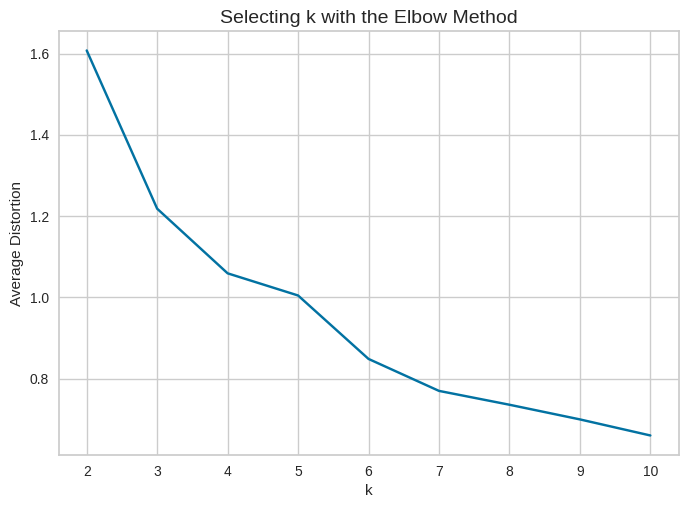

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# --- 1) Numeric-only matrix (exclude target/id) ---
to_exclude = ["Churn", "customerID"]
num_df = churn_ddf.drop(columns=[c for c in to_exclude if c in churn_ddf.columns]).copy()

# force numeric (bad strings -> NaN), keep only numeric cols afterwards
for c in num_df.columns:
    num_df[c] = pd.to_numeric(num_df[c], errors="coerce")
num_df = num_df.select_dtypes(include=["number"])

# --- 2) Clean NaN/Inf + Impute numeric ---
num_df.replace([np.inf, -np.inf], np.nan, inplace=True)
imp = SimpleImputer(strategy="median")
X_imputed = imp.fit_transform(num_df)   # ndarray

# --- 3) Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# safety check
assert np.isfinite(X_scaled).all(), "Still have non-finite values after impute/scale."

# --- 4) Elbow method (distortion) ---
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters=k, random_state=1, n_init="auto")
    km.fit(X_scaled)
    # average min distance of each point to its assigned centroid
    distortion = np.mean(np.min(cdist(X_scaled, km.cluster_centers_, metric="euclidean"), axis=1))
    meanDistortions.append(distortion)
    print(f"Number of Clusters: {k}\tAverage Distortion: {distortion:.4f}")

plt.plot(list(clusters), meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=14)
plt.show()

# --- Optional: simpler elbow using inertia (sum of squared distances) ---
# inertias = []
# for k in clusters:
#     km = KMeans(n_clusters=k, random_state=1, n_init="auto").fit(X_scaled)
#     inertias.append(km.inertia_)
# plt.plot(list(clusters), inertias, "bx-")
# plt.xlabel("k"); plt.ylabel("Inertia (SSE)"); plt.title("Elbow (Inertia)"); plt.show()


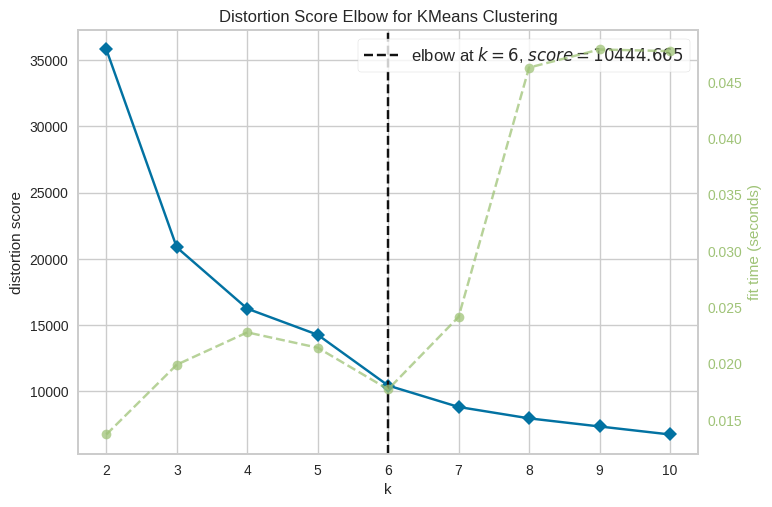

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(X_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

<Axes: xlabel='Cluster', ylabel='MonthlyCharges'>

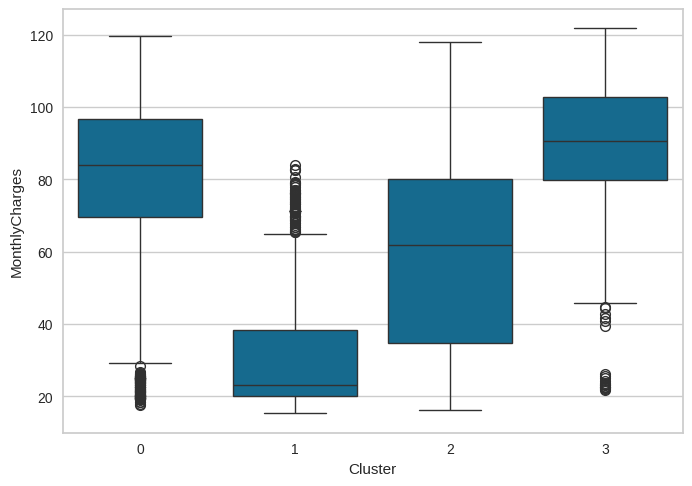

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1)
churn_ddf['Cluster'] = kmeans.fit_predict(X_scaled)

sns.boxplot(x='Cluster', y='MonthlyCharges', data=churn_ddf)


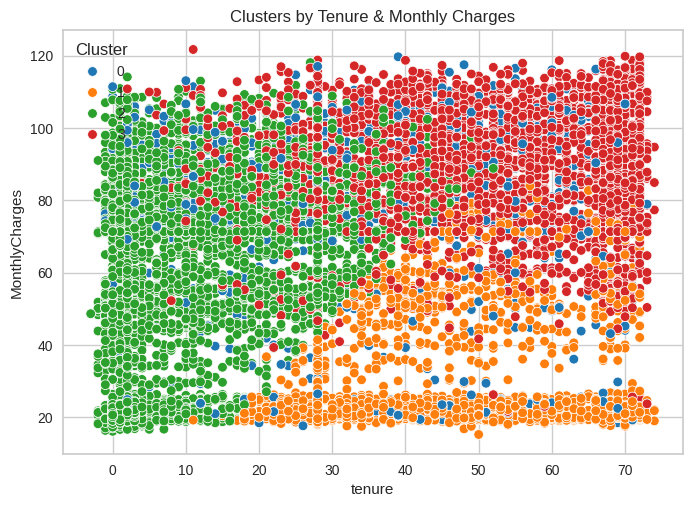

In [ ]:
sns.scatterplot(
    data=churn_ddf,
    x='tenure', y='MonthlyCharges',
    hue='Cluster', palette='tab10'
)
plt.title("Clusters by Tenure & Monthly Charges")
plt.show()


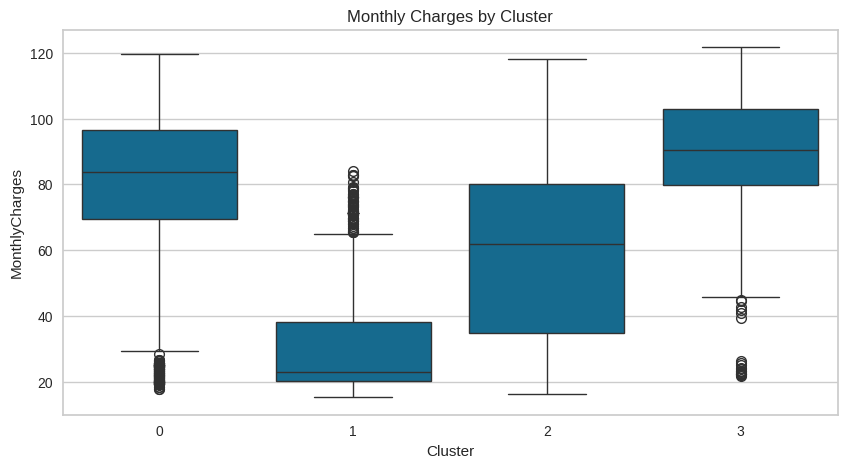

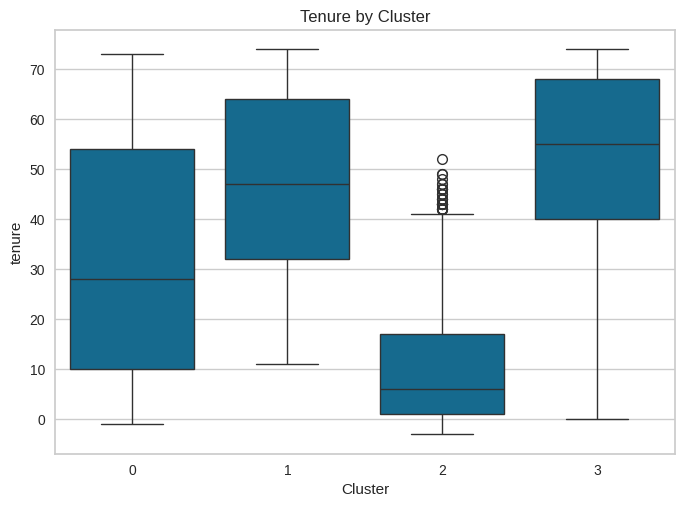

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=churn_ddf, x='Cluster', y='MonthlyCharges')
plt.title("Monthly Charges by Cluster")
plt.show()

sns.boxplot(data=churn_ddf, x='Cluster', y='tenure')
plt.title("Tenure by Cluster")
plt.show()


In [ ]:
# Convert churn to numeric if not already done
churn_ddf['Churn'] = churn_ddf['Churn'].map({'No':0, 'Yes':1}).astype(int)

# Now this will work
churn_rate = churn_ddf.groupby('Cluster')['Churn'].mean()
print(churn_rate)


Cluster
0   0.425
1   0.059
2   0.415
3   0.158
Name: Churn, dtype: float64


In [ ]:
profile = churn_ddf.groupby('Cluster')[['tenure','MonthlyCharges','TotalCharges','Churn']].mean()
print(profile)


         tenure  MonthlyCharges  TotalCharges  Churn
Cluster                                             
0        32.741          77.613      2547.841  0.425
1        47.232          30.472      1268.209  0.059
2        10.321          58.834       819.450  0.415
3        52.345          89.634      4780.818  0.158


## Data Preprocessing

In [ ]:
data1 = churn_df.copy()

In [ ]:

Churn = {"No": 0, "Yes": 1 , "Other": 2}
data1["Churn"] = data1["Churn"].map(Churn)

PaymentMethod = {"Electronic check": 0, "Credit card (automatic)": 1, "Mailed check": 2, "Bank transfer (automatic)": 3}
data1["PaymentMethod"] = data1["PaymentMethod"].map(PaymentMethod)

PaperlessBilling = {"No": 0, "Yes": 1, "No internet service": 2}
data1["PaperlessBilling"] = data1["PaperlessBilling"].map(PaperlessBilling)

Contract = {"Month-to-month": 0, "Two year": 1, "One year": 2}
data1["Contract"] = data1["Contract"].map(Contract)

StreamingMovies = {"No": 0, "Yes": 1, "No internet service": 2}
data1["StreamingMovies"] = data1["StreamingMovies"].map(StreamingMovies)

StreamingTV = {"No": 0, "Yes": 1, "No internet service": 2}
data1["StreamingTV"] = data1["StreamingTV"].map(StreamingTV)

TechSupport = {"No": 0, "Yes": 1, "No internet service": 2}
data1["TechSupport"] = data1["TechSupport"].map(TechSupport)

DeviceProtection = {"No": 0, "Yes": 1, "No internet service": 2}
data1["DeviceProtection"] = data1["DeviceProtection"].map(DeviceProtection)

OnlineBackup = {"No": 0, "Yes": 1, "No internet service": 2}
data1["OnlineBackup"] = data1["OnlineBackup"].map(OnlineBackup)

OnlineSecurity = {"No": 0, "Yes": 1, "No internet service": 2}
data1["OnlineSecurity"] = data1["OnlineSecurity"].map(OnlineSecurity)

InternetService = {"No": 0, "Fiber optic": 1, "DSL": 2}
data1["InternetService"] = data1["InternetService"].map(InternetService)

gender = {"Male": 0, "Female": 1, "Other": 2}
data1["gender"] = data1["gender"].map(gender)

Partner = {"No": 0, "Yes": 1, "Other": 2}
data1["Partner"] = data1["Partner"].map(Partner)

Dependents = {"No": 0, "Yes": 1, "Other": 2}
data1["Dependents"] = data1["Dependents"].map(Dependents)

PhoneService = {"No": 0, "Yes": 1, "Other": 2}
data1["PhoneService"] = data1["PhoneService"].map(PhoneService)

MultipleLines = {"No": 0, "Yes": 1, "No phone service": 2}
data1["MultipleLines"] = data1["MultipleLines"].map(MultipleLines)

In [ ]:
X = data1.drop(["Churn"], axis=1)
y = data1["Churn"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(7233, 19) (2411, 19) (2411, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 7233
Number of rows in validation data = 2411
Number of rows in test data = 2411


### Missing-Value Treatment and Initial Model Building

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   SeniorCitizen     12055 non-null  int64  
 2   Partner           12055 non-null  object 
 3   Dependents        12055 non-null  object 
 4   tenure            11451 non-null  float64
 5   PhoneService      12055 non-null  object 
 6   MultipleLines     12055 non-null  object 
 7   InternetService   12055 non-null  object 
 8   OnlineSecurity    12055 non-null  object 
 9   OnlineBackup      12055 non-null  object 
 10  DeviceProtection  12055 non-null  object 
 11  TechSupport       12055 non-null  object 
 12  StreamingTV       12055 non-null  object 
 13  StreamingMovies   12055 non-null  object 
 14  Contract          12055 non-null  object 
 15  PaperlessBilling  12055 non-null  object 
 16  PaymentMethod     12055 non-null  object

In [ ]:
churn_df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,604
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
X_train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,353
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["tenure", "MonthlyCharges","TotalCharges"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [ ]:
X_train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender, "gender")
inverse_mapping(Partner, "Partner")
inverse_mapping(Dependents, "Dependents")
inverse_mapping(PhoneService, "PhoneService")
inverse_mapping(MultipleLines, "MultipleLines")
inverse_mapping(InternetService, "InternetService")
inverse_mapping(OnlineSecurity, "OnlineSecurity")
inverse_mapping(OnlineBackup, "OnlineBackup")
inverse_mapping(DeviceProtection, "DeviceProtection")
inverse_mapping(TechSupport, "TechSupport")
inverse_mapping(StreamingTV, "StreamingTV")
inverse_mapping(StreamingMovies, "StreamingMovies")
inverse_mapping(Contract, "Contract")
inverse_mapping(PaperlessBilling, "PaperlessBilling")
inverse_mapping(PaymentMethod, "PaymentMethod")


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(7233, 30) (2411, 30) (2411, 30)


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7233, 30)
(2411, 30)
(2411, 30)


## Initial Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogReg", LogisticRegression(solver="liblinear", random_state=1)))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

LogReg: 0.5814977973568282
Bagging: 0.933920704845815
Random forest: 0.9990210474791973
GBM: 0.6010768477728831
Adaboost: 0.531081742535487
dtree: 1.0
Xgboost: 0.8653940283896231

Validation Performance:

LogReg: 0.5756240822320118
Bagging: 0.4889867841409692
Random forest: 0.5286343612334802
GBM: 0.5712187958883994
Adaboost: 0.5168869309838473
dtree: 0.5154185022026432
Xgboost: 0.5903083700440529


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

LogReg: Training Score: 0.5815, Validation Score: 0.5756, Difference: 0.0059
Bagging: Training Score: 0.9339, Validation Score: 0.4890, Difference: 0.4449
Random forest: Training Score: 0.9990, Validation Score: 0.5286, Difference: 0.4704
GBM: Training Score: 0.6011, Validation Score: 0.5712, Difference: 0.0299
Adaboost: Training Score: 0.5311, Validation Score: 0.5169, Difference: 0.0142
dtree: Training Score: 1.0000, Validation Score: 0.5154, Difference: 0.4846
Xgboost: Training Score: 0.8654, Validation Score: 0.5903, Difference: 0.2751


### Tuning Ada Boosting model with Original Data with GRID

In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Define base model
Model = AdaBoostClassifier(random_state=1)

# Define parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125, 150],          # number of weak learners
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0], # contribution of each weak learner
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Define recall-based scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Initialize GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # use all processors
    verbose=1
)

# Fit on undersampled training data
grid_cv.fit(X_train, y_train)

# Print best parameters and CV score
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    grid_cv.best_params_,
    grid_cv.best_score_
))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters are {'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 1.0, 'n_estimators': 100} with CV Recall Score = 0.5839
CPU times: user 4.14 s, sys: 455 ms, total: 4.59 s
Wall time: 6min 48s


In [ ]:
# Tuned AdaBoost Model with org data
tuned_adb_org = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,                # number of weak learners
    learning_rate=1,              # controls contribution of each weak learner
    estimator=DecisionTreeClassifier(
        max_depth=3,                # shallow tree as weak learner
        random_state=1
    )
)

# Fit the tuned model on undersampled training data
tuned_adb_org.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_org_train = model_performance_classification_sklearn(tuned_adb_org, X_train, y_train)
adb_org_train

,Accuracy,Recall,Precision,F1
0,0.802,0.585,0.672,0.626


In [ ]:
# Checking model's performance on validation set
adb_org_val = model_performance_classification_sklearn(tuned_adb_org, X_val, y_val)
adb_org_val

,Accuracy,Recall,Precision,F1
0,0.790,0.601,0.635,0.617


### Tuning Logistic Regression model with original data

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define model
Model = LogisticRegression(
    solver="liblinear",   # good for small datasets and L1/L2 penalties
    random_state=1
)

# Parameter grid for RandomizedSearchCV
param_grid = {
    "penalty": ["l1", "l2"],                # regularization type
    "C": np.logspace(-3, 3, 20),            # inverse regularization strength
    "class_weight": [None, "balanced"],     # handle imbalance
}

# Define recall-based scoring (for imbalanced classification)
scorer = metrics.make_scorer(metrics.recall_score)

# Randomized search with 5-fold cross-validation
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=30,            # Number of random combinations
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=1
)

# Fit on undersampled training data
randomized_cv.fit(X_train, y_train)

# Print best parameters and cross-validation score
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters are {'penalty': 'l1', 'class_weight': 'balanced', 'C': np.float64(0.3359818286283781)} with CV Recall Score = 0.7988
CPU times: user 419 ms, sys: 38.7 ms, total: 458 ms
Wall time: 8.56 s


In [ ]:
# Tuned Logistic Regression Model
tuned_logreg_org = LogisticRegression(
    random_state=1,
    solver="liblinear",     # supports both L1 and L2 regularization
    penalty="l1",           # type of regularization
    C=0.3359818286283781,                  # inverse of regularization strength
    class_weight="balanced" # handle imbalanced data
)

# Fit the tuned model on undersampled training data
tuned_logreg_org.fit(X_train, y_train)


LogisticRegression(C=0.3359818286283781, class_weight='balanced', penalty='l1',
                   random_state=1, solver='liblinear')

In [ ]:
# Checking model's performance on training set
train_Logreg_org = model_performance_classification_sklearn(tuned_logreg_org, X_train, y_train)
train_Logreg_org

,Accuracy,Recall,Precision,F1
0,0.762,0.805,0.553,0.656


In [ ]:
# Checking model's performance on validation set
val_Logreg_org = model_performance_classification_sklearn(tuned_logreg_org, X_val, y_val)
val_Logreg_org

,Accuracy,Recall,Precision,F1
0,0.758,0.806,0.548,0.653


### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2043
Before Oversampling, counts of label 'No': 5190 

After Oversampling, counts of label 'Yes': 5190
After Oversampling, counts of label 'No': 5190 

After Oversampling, the shape of train_X: (10380, 30)
After Oversampling, the shape of train_y: (10380,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogReg", LogisticRegression(solver="liblinear", random_state=1)))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

LogReg: 0.8167630057803468
Bagging: 0.9845857418111753
Random forest: 0.999421965317919
GBM: 0.8601156069364162
Adaboost: 0.8233140655105973
dtree: 0.9986512524084779
Xgboost: 0.9475915221579961

Validation Performance:

LogReg: 0.6637298091042585
Bagging: 0.57856093979442
Random forest: 0.6417033773861968
GBM: 0.697503671071953
Adaboost: 0.7033773861967695
dtree: 0.580029368575624
Xgboost: 0.6226138032305433


In [ ]:
print("\nTraining and Validation Performance Difference (Oversampled):\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference (Oversampled):

LogReg: Training Score: 0.8168, Validation Score: 0.6637, Difference: 0.1530
Bagging: Training Score: 0.9846, Validation Score: 0.5786, Difference: 0.4060
Random forest: Training Score: 0.9994, Validation Score: 0.6417, Difference: 0.3577
GBM: Training Score: 0.8601, Validation Score: 0.6975, Difference: 0.1626
Adaboost: Training Score: 0.8233, Validation Score: 0.7034, Difference: 0.1199
dtree: Training Score: 0.9987, Validation Score: 0.5800, Difference: 0.4186
Xgboost: Training Score: 0.9476, Validation Score: 0.6226, Difference: 0.3250


### Model Building - Undersampled Data


In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2043
Before Under Sampling, counts of label 'No': 5190 

After Under Sampling, counts of label 'Yes': 2043
After Under Sampling, counts of label 'No': 2043 

After Under Sampling, the shape of train_X: (4086, 30)
After Under Sampling, the shape of train_y: (4086,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogReg", LogisticRegression(solver="liblinear", random_state=1)))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

LogReg: 0.8086147821830642
Bagging: 0.9691629955947136
Random forest: 0.9995105237395986
GBM: 0.8370044052863436
Adaboost: 0.8056779246206559
dtree: 0.9975526186979932
Xgboost: 0.9755261869799314

Validation Performance:

LogReg: 0.8091042584434655
Bagging: 0.7048458149779736
Random forest: 0.788546255506608
GBM: 0.8311306901615272
Adaboost: 0.8135095447870778
dtree: 0.6828193832599119
Xgboost: 0.7929515418502202


In [ ]:
print("\nTraining and Validation Performance Difference(undersampled):\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference(undersampled):

LogReg: Training Score: 0.8086, Validation Score: 0.8091, Difference: -0.0005
Bagging: Training Score: 0.9692, Validation Score: 0.7048, Difference: 0.2643
Random forest: Training Score: 0.9995, Validation Score: 0.7885, Difference: 0.2110
GBM: Training Score: 0.8370, Validation Score: 0.8311, Difference: 0.0059
Adaboost: Training Score: 0.8057, Validation Score: 0.8135, Difference: -0.0078
dtree: Training Score: 0.9976, Validation Score: 0.6828, Difference: 0.3147
Xgboost: Training Score: 0.9755, Validation Score: 0.7930, Difference: 0.1826


🔍 ***Interpreting the results***

✅ Best performing and stable models

Undersampled GBM (Diff = 0.0059) → Excellent generalization, almost no overfit.

Undersampled AdaBoost (Diff = -0.0078) → Consistent and balanced.

Undersampled Logistic Regression (Diff = -0.0005) → Very stable baseline model.

These three models maintain near-identical train/validation scores, which indicates strong generalization and low variance — ideal candidates for hyperparameter tuning.

### Tuning GBM model with Undersampled data

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(50, 301, 50),     # Number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],  # Shrinks contribution of each tree
    "max_depth": [2, 3, 4, 5],                  # Depth of individual estimators
    "min_samples_split": [2, 5, 10],            # Min samples to split an internal node
    "min_samples_leaf": [1, 2, 4],              # Min samples required at a leaf node
    "subsample": [0.6, 0.8, 1.0],               # Fraction of samples for fitting each tree
}

# Define recall-based scoring
scorer = metrics.make_scorer(metrics.recall_score)

# Randomized search with 5-fold cross-validation
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=1
)

# Fit on undersampled training data
randomized_cv.fit(X_train_un, y_train_un)

# Print results
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 2, 'learning_rate': 0.01} with CV Recall Score = 0.8360
CPU times: user 2.48 s, sys: 218 ms, total: 2.7 s
Wall time: 4min 19s


In [ ]:
# Tuned Gradient Boosting Model
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    n_estimators=150,        # number of boosting stages
    learning_rate=0.01,       # step size shrinkage
    max_depth=2,             # depth of individual estimators
    min_samples_split=2,     # min samples to split a node
    min_samples_leaf=1,      # min samples required at leaf node
    subsample=0.8            # fraction of samples for fitting each base learner
)

# Fit the tuned model on undersampled training data
tuned_gbm.fit(X_train_un, y_train_un)


GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=150,
                           random_state=1, subsample=0.8)

In [ ]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(tuned_gbm, X_train_un, y_train_un)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.773,0.837,0.743,0.787


In [ ]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

,Accuracy,Recall,Precision,F1
0,0.731,0.843,0.515,0.639


### Tuning  Ada Boosting model with Undersampled Data with GRID

In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Define base model
Model = AdaBoostClassifier(random_state=1)

# Define parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125, 150],          # number of weak learners
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0], # contribution of each weak learner
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Define recall-based scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Initialize GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # use all processors
    verbose=1
)

# Fit on undersampled training data
grid_cv.fit(X_train_un, y_train_un)

# Print best parameters and CV score
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    grid_cv.best_params_,
    grid_cv.best_score_
))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters are {'estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'learning_rate': 0.01, 'n_estimators': 50} with CV Recall Score = 0.9736
CPU times: user 2.56 s, sys: 302 ms, total: 2.86 s
Wall time: 4min 34s


In [ ]:
# Tuned AdaBoost Model
tuned_adb_grid = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,                # number of weak learners
    learning_rate=0.01,              # controls contribution of each weak learner
    estimator=DecisionTreeClassifier(
        max_depth=1,                # shallow tree as weak learner
        random_state=1
    )
)

# Fit the tuned model on undersampled training data
tuned_adb_grid.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_grid_train = model_performance_classification_sklearn(tuned_adb_grid, X_train_un, y_train_un)
adb_grid_train


,Accuracy,Recall,Precision,F1
0,0.653,0.974,0.593,0.737


In [ ]:
# Checking model's performance on validation set
adb_grid_val = model_performance_classification_sklearn(tuned_adb_grid, X_val, y_val)
adb_grid_val

,Accuracy,Recall,Precision,F1
0,0.504,0.963,0.359,0.523


### Tuning AdaBoost model with Undersampled data

In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 201, 20),     # Number of weak learners
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],  # Step size shrinkage
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1)
    ],
}

# Define recall-based scoring (since dataset is imbalanced)
scorer = metrics.make_scorer(metrics.recall_score)

# Randomized search with 5-fold cross-validation
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,          # Number of random parameter combinations
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=1
)

# Fit on undersampled training data
randomized_cv.fit(X_train_un, y_train_un)

# Print best parameters and cross-validation score
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'n_estimators': np.int64(90), 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV Recall Score = 0.9736
CPU times: user 1.88 s, sys: 226 ms, total: 2.1 s
Wall time: 3min 10s


In [ ]:
# Tuned AdaBoost Model
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,                # number of weak learners
    learning_rate=0.01,              # controls contribution of each weak learner
    estimator=DecisionTreeClassifier(
        max_depth=1,                # shallow tree as weak learner
        random_state=1
    )
)

# Fit the tuned model on undersampled training data
tuned_adb.fit(X_train_un, y_train_un)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.653,0.974,0.593,0.737


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.504,0.963,0.359,0.523


### Tuning Logistic Regression model with Undersampled data

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define model
Model = LogisticRegression(
    solver="liblinear",   # good for small datasets and L1/L2 penalties
    random_state=1
)

# Parameter grid for RandomizedSearchCV
param_grid = {
    "penalty": ["l1", "l2"],                # regularization type
    "C": np.logspace(-3, 3, 20),            # inverse regularization strength
    "class_weight": [None, "balanced"],     # handle imbalance
}

# Define recall-based scoring (for imbalanced classification)
scorer = metrics.make_scorer(metrics.recall_score)

# Randomized search with 5-fold cross-validation
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=30,            # Number of random combinations
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=1
)

# Fit on undersampled training data
randomized_cv.fit(X_train_un, y_train_un)

# Print best parameters and cross-validation score
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters are {'penalty': 'l1', 'class_weight': None, 'C': np.float64(0.6951927961775606)} with CV Recall Score = 0.8013
CPU times: user 248 ms, sys: 19.8 ms, total: 268 ms
Wall time: 4.06 s


In [ ]:
# Tuned Logistic Regression Model
tuned_logreg = LogisticRegression(
    random_state=1,
    solver="liblinear",     # supports both L1 and L2 regularization
    penalty="l1",           # type of regularization
    C=0.6951927961775606,                  # inverse of regularization strength
    class_weight=None # handle imbalanced data
)

# Fit the tuned model on undersampled training data
tuned_logreg.fit(X_train_un, y_train_un)


LogisticRegression(C=0.6951927961775606, penalty='l1', random_state=1,
                   solver='liblinear')

In [ ]:
# Checking model's performance on training set
train_Logreg = model_performance_classification_sklearn(tuned_logreg, X_train_un, y_train_un)
train_Logreg

,Accuracy,Recall,Precision,F1
0,0.781,0.811,0.765,0.787


In [ ]:
# Checking model's performance on validation set
val_Logreg = model_performance_classification_sklearn(tuned_logreg, X_val, y_val)
val_Logreg

,Accuracy,Recall,Precision,F1
0,0.755,0.814,0.545,0.653


### Tuning AdaBoost model with Oversampled data

In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 201, 20),     # Number of weak learners
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],  # Step size shrinkage
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1)
    ],
}

# Define recall-based scoring (since dataset is imbalanced)
scorer = metrics.make_scorer(metrics.recall_score)

# Randomized search with 5-fold cross-validation
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,          # Number of random parameter combinations
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=1
)

# Fit on undersampled training data
randomized_cv.fit(X_train_over, y_train_over)

# Print best parameters and cross-validation score
print("Best parameters are {} with CV Recall Score = {:.4f}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=4, random_state=1)} with CV Recall Score = 0.8299
CPU times: user 3.11 s, sys: 468 ms, total: 3.58 s
Wall time: 6min 48s


In [ ]:
# Tuned AdaBoost Model
tuned_adb_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,                # number of weak learners
    learning_rate=0.1,              # controls contribution of each weak learner
    estimator=DecisionTreeClassifier(
        max_depth=4,                # shallow tree as weak learner
        random_state=1
    )
)

# Fit the tuned model on undersampled training data
tuned_adb_over.fit(X_train_over, y_train_over)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_over_train = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_over_train

,Accuracy,Recall,Precision,F1
0,0.812,0.849,0.790,0.819


In [ ]:
# Checking model's performance on validation set
adb_over_val = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_over_val

,Accuracy,Recall,Precision,F1
0,0.754,0.762,0.546,0.636


## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [adb_org_train.T, train_Logreg_org.T, gbm_train.T, adb_grid_train.T, adb_train.T, train_Logreg.T, adb_over_train.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Tuning Ada Boosting model with Original Data with GRID",
    "Tuning Logistic Regression model with original data",
    "Tuned Gradient Boosting with undersample",
    "Tuning Ada Boosting model with Undersampled Data with GRID",
    "Tuning AdaBoost model with Undersampled data",
    "Tuning Logistic Regression model with Undersampled data",
    "Tuning AdaBoost model with Oversampled data"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuning Ada Boosting model with Original Data with GRID,Tuning Logistic Regression model with original data,Tuned Gradient Boosting with undersample,Tuning Ada Boosting model with Undersampled Data with GRID,Tuning AdaBoost model with Undersampled data,Tuning Logistic Regression model with Undersampled data,Tuning AdaBoost model with Oversampled data
Accuracy,0.802,0.762,0.773,0.653,0.653,0.781,0.812
Recall,0.585,0.805,0.837,0.974,0.974,0.811,0.849
Precision,0.672,0.553,0.743,0.593,0.593,0.765,0.790
F1,0.626,0.656,0.787,0.737,0.737,0.787,0.819


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [adb_org_val.T, val_Logreg_org.T, gbm_val.T, adb_grid_val.T,
    adb_val.T, val_Logreg.T,adb_over_val.T],
    axis=1,
)

models_val_comp_df.columns = [
    "Tuning Ada Boosting model with Original Data with GRID",
    "Tuning Logistic Regression model with original data",
    "Tuned Gradient Boosting with undersample",
    "Tuning Ada Boosting model with Undersampled Data with GRID",
    "Tuning AdaBoost model with Undersampled data",
    "Tuning Logistic Regression model with Undersampled data",
    "Tuning AdaBoost model with Oversampled data"
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Tuning Ada Boosting model with Original Data with GRID,Tuning Logistic Regression model with original data,Tuned Gradient Boosting with undersample,Tuning Ada Boosting model with Undersampled Data with GRID,Tuning AdaBoost model with Undersampled data,Tuning Logistic Regression model with Undersampled data,Tuning AdaBoost model with Oversampled data
Accuracy,0.790,0.758,0.731,0.504,0.504,0.755,0.754
Recall,0.601,0.806,0.843,0.963,0.963,0.814,0.762
Precision,0.635,0.548,0.515,0.359,0.359,0.545,0.546
F1,0.617,0.653,0.639,0.523,0.523,0.653,0.636


In [ ]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(tuned_logreg_org, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.758,0.787,0.550,0.647


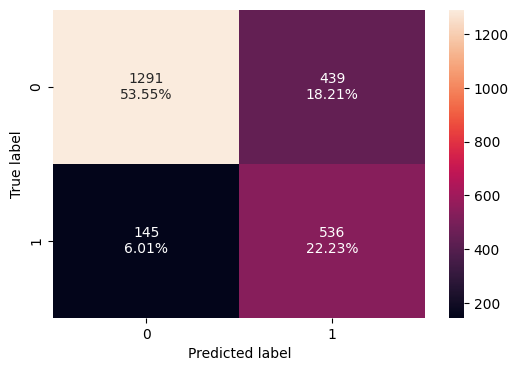

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_logreg_org, X_test, y_test)

## Feature Importance

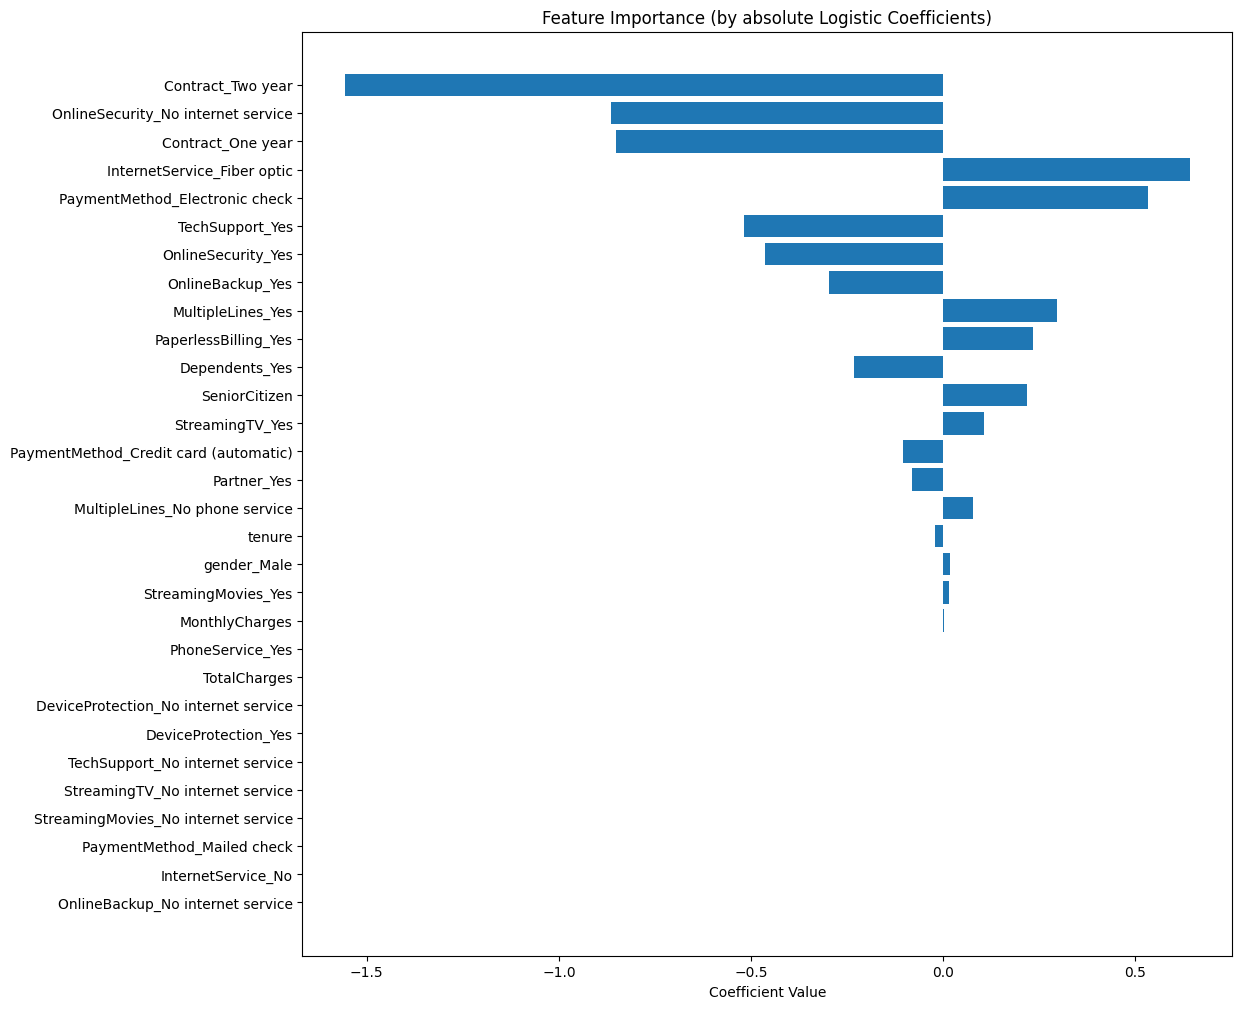

In [ ]:
# Get feature names (works only if no OneHotEncoder was used)
feature_names = X_train.columns

# For binary logistic regression → coef_ returns shape (1, n_features)
coefs = tuned_logreg_org.coef_[0]

# Get sorted indices by absolute weight
indices = np.argsort(np.abs(coefs))

plt.figure(figsize=(12, 12))
plt.title("Feature Importance (by absolute Logistic Coefficients)")
plt.barh(range(len(indices)), coefs[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Coefficient Value")
plt.show()


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Karthick_CustomerChurnPrediction_Notebook.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Karthick_CustomerChurnPrediction_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 30 image(s).
[NbConvertApp] Writing 3064884 bytes to /content/drive/MyDrive/Colab Notebooks/Karthick_CustomerChurnPrediction_Notebook.html
